<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/UniqueItems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [34]:
def unique_Naive(L):
  i=0
  while i < len(L) - 1:
    j = i + 1
    while j < len(L):
      if L[i]==L[j]:
        return False
      j += 1
    i += 1
  return True

def unique_Sort(L):
  L = sorted(L)
  i=1
  while i < len(L):
    if L[i-1]==L[i]:
      return False
    i += 1
  return True

def unique_Hash(L):
  H = set() #HashSet
  i = 0
  while i < len(L):
    if L[i] in H:
      return False
    H.add(L[i])
    i += 1
  return True
  

Coleta de dados dos experimentos

In [35]:
import time
from numpy import random
DOMAIN = 100000000 ##Você deve escolher um domínio mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
 
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [unique_Naive, unique_Sort, unique_Hash]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 6 

sizes = [5000,10000,15000,20000,25000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=5000
Starting round 2, size=10000
Starting round 3, size=15000
Starting round 4, size=20000
Starting round 5, size=25000
Finish data collection


Formata os dados do experimento para serem exibidos

In [36]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
unique_Naive##5000,3.082502,unique_Naive,5000
unique_Sort##5000,0.003025,unique_Sort,5000
unique_Hash##5000,0.002111,unique_Hash,5000
unique_Naive##10000,9.009892,unique_Naive,10000
unique_Sort##10000,0.006381,unique_Sort,10000
unique_Hash##10000,0.003212,unique_Hash,10000
unique_Naive##15000,15.909494,unique_Naive,15000
unique_Sort##15000,0.009163,unique_Sort,15000
unique_Hash##15000,0.004115,unique_Hash,15000
unique_Naive##20000,23.691444,unique_Naive,20000


Resultado do experimento (gráfico)

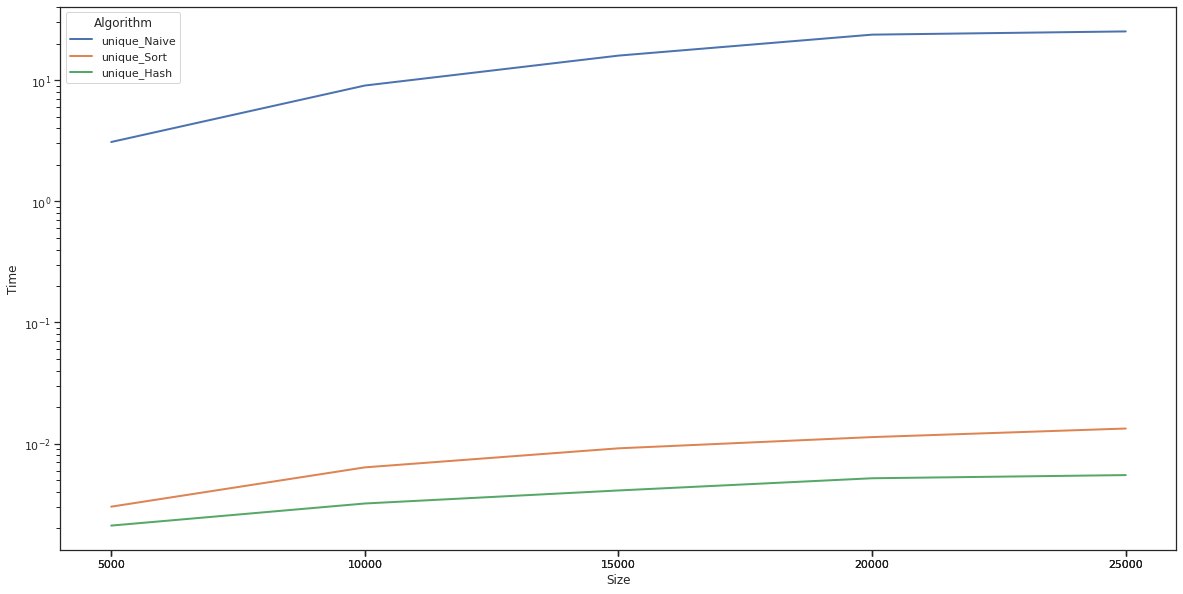

In [37]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()